In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras import backend as K

/home/grzegorz/miniconda3/envs/gk_py/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


7291
256
256
8.0
(7291, 16, 16)
x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


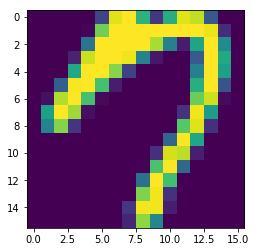

In [13]:
test_txt = 'data/zip_test.txt'
train_txt = 'data/zip_train.txt'
# train_raw = np.loadtxt(train_txt, delimiter=',', usecols=(0, 2), unpack=True)
train_raw = np.loadtxt(train_txt)
test_raw = np.loadtxt(test_txt)

train_lab = train_raw[:, 0]
train_raw = train_raw[:, 1:]

test_lab = test_raw[:, 0]
test_raw = test_raw[:, 1:]

print(train_lab.size)
print(train_raw[0].size)
print(len(train_raw[4]))

# Cleaning the data
train_mat = list()
for ith in train_raw:
    image = np.resize(ith,(16,16))
    train_mat.append(image)
train_mat = np.array(train_mat)

test_mat = list()
for ith in test_raw:
    image = np.resize(ith,(16,16))
    test_mat.append(image)
test_mat = np.array(test_mat)

idn = 110
print(train_lab[idn])
mgplot = plt.imshow(train_mat[10])
print(train_mat.shape)

batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 16, 16

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = train_mat.reshape(train_mat.shape[0], img_rows, img_cols, 1)
x_test = test_mat.reshape(test_mat.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_lab.astype('int'), num_classes)
y_test = keras.utils.to_categorical(test_lab.astype('int'), num_classes)

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 12s 2ms/step - loss: 1.4788 - acc: 0.6590 - val_loss: 0.8631 - val_acc: 0.8401
Epoch 2/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.5518 - acc: 0.9093 - val_loss: 0.5554 - val_acc: 0.8655
Epoch 3/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3361 - acc: 0.9387 - val_loss: 0.3889 - val_acc: 0.9068
Epoch 4/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.2440 - acc: 0.9532 - val_loss: 0.3476 - val_acc: 0.9123
Epoch 5/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.1984 - acc: 0.9619 - val_loss: 0.3238 - val_acc: 0.9143
Epoch 6/6
7291/7291 [==============================] - 11s 1ms/step - loss: 0.1627 - acc: 0.9704 - val_loss: 0.2955 - val_acc: 0.9173
Test loss: 0.29554126076455967
Test accuracy: 0.9172894869150068


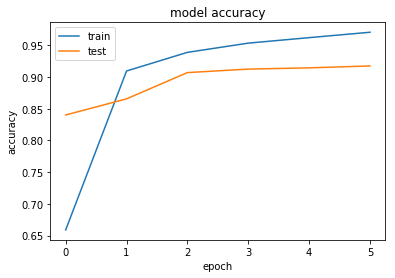

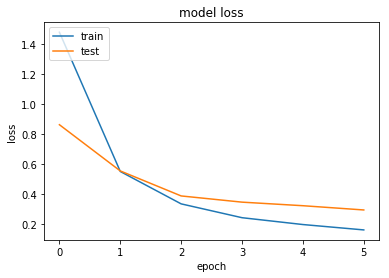

In [16]:
# Task I –Neural Network Design

# (1) Fully connected, where each input/neuron is connected to all the ne
# urons in the next layer

model = Sequential()
model.add(Dense(32, 
                 activation='relu',
                 input_shape=input_shape))
model.add(Dense(64, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_1 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_1.history['acc'])
plt.plot(task_I_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_1_acc.jpg')
plt.show()

plt.plot(task_I_1.history['loss'])
plt.plot(task_I_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_1_loss.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 45s 6ms/step - loss: 2.2868 - acc: 0.1557 - val_loss: 2.2469 - val_acc: 0.1789
Epoch 2/6
7291/7291 [==============================] - 39s 5ms/step - loss: 2.1584 - acc: 0.2284 - val_loss: 1.8560 - val_acc: 0.4340
Epoch 3/6
7291/7291 [==============================] - 52s 7ms/step - loss: 1.2763 - acc: 0.6828 - val_loss: 0.9169 - val_acc: 0.7678
Epoch 4/6
7291/7291 [==============================] - 37s 5ms/step - loss: 0.6744 - acc: 0.8388 - val_loss: 0.6703 - val_acc: 0.8022
Epoch 5/6
7291/7291 [==============================] - 34s 5ms/step - loss: 0.5005 - acc: 0.8678 - val_loss: 0.5720 - val_acc: 0.8261
Epoch 6/6
7291/7291 [==============================] - 42s 6ms/step - loss: 0.4151 - acc: 0.8834 - val_loss: 0.5103 - val_acc: 0.8426
Test loss: 0.5103211684730674
Test accuracy: 0.8425510711615277


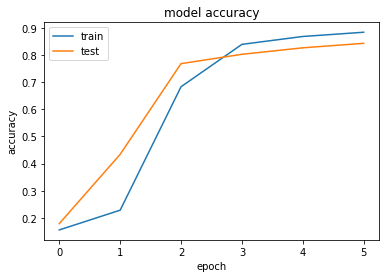

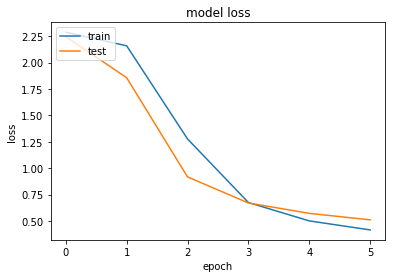

In [12]:
# (2) Locally connected  with  no  weights shared inthe
# first  three  layers,  where  each  input/neuron  is 
# connected to the neurons in a local neighbor in the next layer

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_2 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_2.history['acc'])
plt.plot(task_I_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_2_acc.jpg')
plt.show()

plt.plot(task_I_2.history['loss'])
plt.plot(task_I_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_2_loss.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 14s 2ms/step - loss: 2.3565 - acc: 0.0912 - val_loss: 2.2983 - val_acc: 0.0997
Epoch 2/6
7291/7291 [==============================] - 10s 1ms/step - loss: 2.3024 - acc: 0.0959 - val_loss: 2.2989 - val_acc: 0.1844
Epoch 3/6
7291/7291 [==============================] - 9s 1ms/step - loss: 1.6020 - acc: 0.3722 - val_loss: 0.6034 - val_acc: 0.8256
Epoch 4/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.3701 - acc: 0.8859 - val_loss: 0.5313 - val_acc: 0.8465
Epoch 5/6
7291/7291 [==============================] - 13s 2ms/step - loss: 0.2579 - acc: 0.9246 - val_loss: 0.3767 - val_acc: 0.9113
Epoch 6/6
7291/7291 [==============================] - 13s 2ms/step - loss: 0.1826 - acc: 0.9487 - val_loss: 0.3274 - val_acc: 0.9223
Test loss: 0.32739835755930174
Test accuracy: 0.9222720479513795


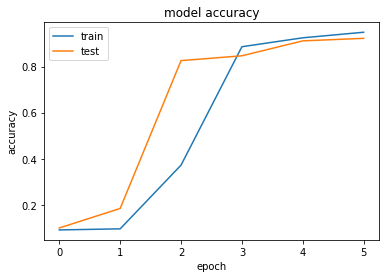

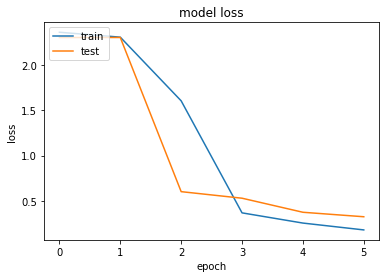

In [17]:
# (3) Locally connected with weights shared in the first three layers
# (i.e., a convolutional neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_I_3 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_3.history['acc'])
plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_3_acc.jpg')
plt.show()

plt.plot(task_I_3.history['loss'])
plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_3_loss.jpg')
plt.show()

In [19]:
# Task II 
# Techniques for Optimization You need to do the required analysis and 
# then perform experiments for each of the three networks.

# (1) Parameter  initialization  strategies.  For  each  of  the  networks,  analyze
# how  parameters  should  be initialized. Then demonstrate three cases based on your analysis
# 1) learning is very slow; 2) learning is effective (i.e., fast with accurate results)
# ; and 3) the learning is too fast (i.e., the network does not give good performance).
# task_II_1_vs
# kernel_initializer=keras.initializers.Constant(value=50000)

# task_II_1_ef
# kernel_initializer=keras.initializers.Constant(value=0.5)

# task_II_1_tf
# kernel_initializer=keras.initializers.Constant(value=0.5)



model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Dense(64, activation='relu',kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Dense(32, activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_1_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_1_vs.history['acc'])
plt.plot(task_II_1_ef.history['acc'])
plt.plot(task_II_1_tf.history['acc'])
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['vs', 'ef','tf'], loc='upper left')
plt.savefig('task_II_1_I_acc.jpg')
plt.show()

plt.plot(task_II_1_vs.history['loss'])
plt.plot(task_II_1_ef.history['loss'])
plt.plot(task_II_1_tf.history['loss'])
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['vs', 'ef','tf'], loc='upper left')
plt.savefig('task_II_1_I_loss.jpg')
plt.show()

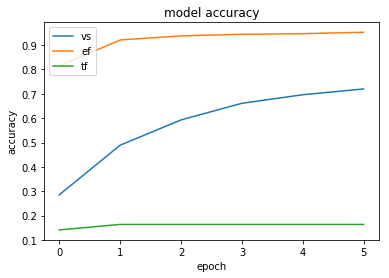

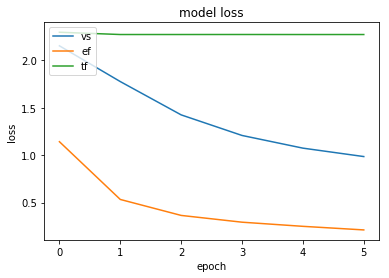

In [20]:
# task_II_2_vs
# kernel_initializer=keras.initializers.Constant(value=50000)

# task_II_2_ef
# kernel_initializer=keras.initializers.Constant(value=0.5)

# task_II_2_tf
# kernel_initializer=keras.initializers.Constant(value=0.5)

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(LocallyConnected2D(64, (3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(LocallyConnected2D(64, (3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(LocallyConnected2D(64, (3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0.0)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_2_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_2_vs.history['acc'])
plt.plot(task_II_2_ef.history['acc'])
plt.plot(task_II_2_tf.history['acc'])
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['vs', 'ef','tf'], loc='upper left')
plt.savefig('task_II_1_II_acc.jpg')
plt.show()

plt.plot(task_II_1_vs.history['loss'])
plt.plot(task_II_1_ef.history['loss'])
plt.plot(task_II_1_tf.history['loss'])
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['vs', 'ef','tf'], loc='upper left')
plt.savefig('task_II_1_II_loss.jpg')
plt.show()

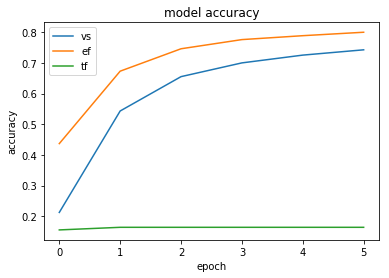

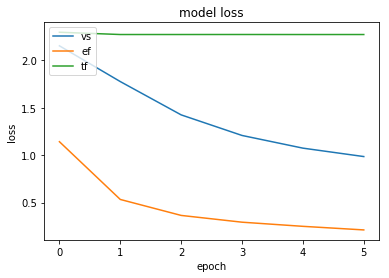

In [ ]:
# task_II_1_vs
# kernel_initializer=keras.initializers.Constant(value=50000)

# task_II_2_ef
# kernel_initializer=keras.initializers.Constant(value=0.5)

# task_II_3_tf
# kernel_initializer=keras.initializers.Constant(value=0.5)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=50000)))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_vs = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0.5)))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_ef = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape, kernel_initializer=keras.initializers.Constant(value=0)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer=keras.initializers.Constant(value=0)))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
task_II_3_tf = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_II_1_vs.history['acc'])
plt.plot(task_II_1_ef.history['acc'])
plt.plot(task_II_1_tf.history['acc'])
# plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['vs', 'ef','tf'], loc='upper left')
plt.savefig('task_II_1_III_acc.jpg')
plt.show()

plt.plot(task_II_1_vs.history['loss'])
plt.plot(task_II_1_ef.history['loss'])
plt.plot(task_II_1_tf.history['loss'])
# plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['vs', 'ef','tf'], loc='upper left')
plt.savefig('task_II_1_III_loss.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 15s 2ms/step - loss: 1.5833 - acc: 0.4961 - val_loss: 1.0826 - val_acc: 0.7235
Epoch 2/6
7291/7291 [==============================] - 11s 1ms/step - loss: 0.8462 - acc: 0.7548 - val_loss: 0.8524 - val_acc: 0.7544
Epoch 3/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.7048 - acc: 0.7999 - val_loss: 0.7359 - val_acc: 0.7783
Epoch 4/6
7291/7291 [==============================] - 13s 2ms/step - loss: 0.6363 - acc: 0.8139 - val_loss: 0.7403 - val_acc: 0.7972
Epoch 5/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.6373 - acc: 0.8188 - val_loss: 1.0032 - val_acc: 0.7768
Epoch 6/6
5632/7291 [======================>.......] - ETA: 2s - loss: 0.6333 - acc: 0.8246

In [ ]:
# (2)Learning rate. Estimate a good learning rate for each of the networks. Then demonstrate three cases
# based on your analysis: 1) learning is very slow; 2) learning is effective; and 3) learning is too fast.

In [ ]:
# (3)Explain  how  the  batch  size  would  impact  the  batch  normalization  for  each  of  the  networks.  Then 
# demonstrate an effective batch size and an ineffective batch size on each of the three networks  you 
# have.

In [ ]:
# (4)Momentum. Commonly  used  momentum coefficient  values  are  0.5,  0.9, and  0.99.
# Using  the  best parameter initialization strategy, the best learning rate, and the best 
# batch size you have foundso far, experiment with the three different momentum values on the three networ
# ks you have and document the results. Explain the differences you have observed on the three neural networks you have.